# Covid와 HeartDisease

In [160]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

font_path = 'C:\\Windows\\Fonts\\HANYGO230.ttf'
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
matplotlib.rc('font', family=font_name)
plt.rc('axes', unicode_minus=False)

### 01. 데이터 수집 및 로딩

In [161]:
df = pd.read_csv('data/heart_2022_with_nans.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [162]:
# 필요한 변수만 선택
cols = ["CovidPos", "PneumoVaxEver", "HIVTesting", "HadHeartAttack", 'HadAngina', "GeneralHealth"]
df= df[cols]
df.head()

,CovidPos,PneumoVaxEver,HIVTesting,HadHeartAttack,HadAngina,GeneralHealth
0,No,No,No,No,No,Very good
1,No,No,No,No,No,Excellent
2,Yes,No,No,No,No,Very good
3,No,Yes,No,No,No,Excellent
4,No,Yes,No,No,No,Fair


### 02. 데이터 구조 및 변수 이해

In [163]:
print(df.shape)
print(df.dtypes)
df.head()

(445132, 6)
CovidPos          object
PneumoVaxEver     object
HIVTesting        object
HadHeartAttack    object
HadAngina         object
GeneralHealth     object
dtype: object


,CovidPos,PneumoVaxEver,HIVTesting,HadHeartAttack,HadAngina,GeneralHealth
0,No,No,No,No,No,Very good
1,No,No,No,No,No,Excellent
2,Yes,No,No,No,No,Very good
3,No,Yes,No,No,No,Excellent
4,No,Yes,No,No,No,Fair


### 03. 데이터 요약 및 기술 통계


In [164]:
for col in df.columns:
    print(df[col].value_counts(dropna=False))

CovidPos
No                                                               270055
Yes                                                              110877
NaN                                                               50764
Tested positive using home test without a health professional     13436
Name: count, dtype: int64
PneumoVaxEver
No     215604
Yes    152488
NaN     77040
Name: count, dtype: int64
HIVTesting
No     249919
Yes    129086
NaN     66127
Name: count, dtype: int64
HadHeartAttack
No     416959
Yes     25108
NaN      3065
Name: count, dtype: int64
HadAngina
No     414176
Yes     26551
NaN      4405
Name: count, dtype: int64
GeneralHealth
Very good    148444
Good         143598
Excellent     71878
Fair          60273
Poor          19741
NaN            1198
Name: count, dtype: int64


### 04. 결측치 및 이상치 탐색

In [165]:
# 결측치 개수
df.isnull().sum()
# 결측치 비율
df.isnull().mean().round(3)

CovidPos          0.114
PneumoVaxEver     0.173
HIVTesting        0.149
HadHeartAttack    0.007
HadAngina         0.010
GeneralHealth     0.003
dtype: float64

### 05. 변수 전처리

In [166]:
# Yes/No -> 1/0 변환
for col in ['CovidPos', 'PneumoVaxEver', 'HIVTesting', 'HadHeartAttack', 'HadAngina']:
    df[col] = df[col].map({'Yes' : 1, 'No' : 0})

df['CovidPos'] = df['CovidPos'].replace({
    'Yes': 1,
    'No': 0,
    'Tested positive using home test without a health professional': 1
})

# GeneralHealth 값 변환
health_map = {
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Very good': 4,
    'Excellent': 5
}

df['GeneralHealth'] = df['GeneralHealth'].map(health_map)

# 결측치 제거
df = df.dropna()
print(df.shape) # (0, 40)


(330255, 6)


### 06. Feature Engineering

In [167]:
# 심혈관질환 변수들 통합하기
df['CardioDisease'] = np.where(
    (df['HadHeartAttack'] == 1) | (df['HadAngina'] == 1),
    1, 0
)
# np.where(조건, 참값, 거짓값)

df[['HadHeartAttack','HadAngina','CardioDisease']].head(10)

,HadHeartAttack,HadAngina,CardioDisease
0,0.0,0.0,0
1,0.0,0.0,0
2,0.0,0.0,0
3,0.0,0.0,0
4,0.0,0.0,0
5,1.0,0.0,1
6,0.0,0.0,0
7,0.0,0.0,0
8,0.0,0.0,0
10,0.0,0.0,0


### 07. 변수 분포 시각화

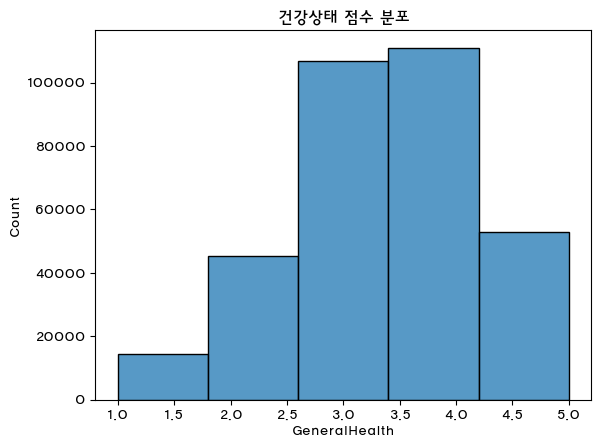

In [168]:
# 건강상태 분포
sns.histplot(df['GeneralHealth'], bins=5)
plt.title('건강상태 점수 분포')
plt.show()

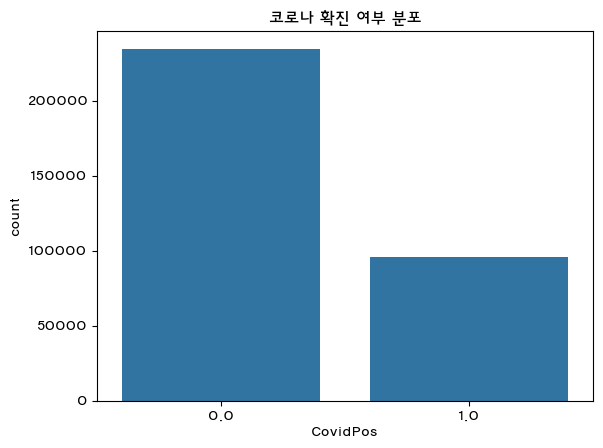

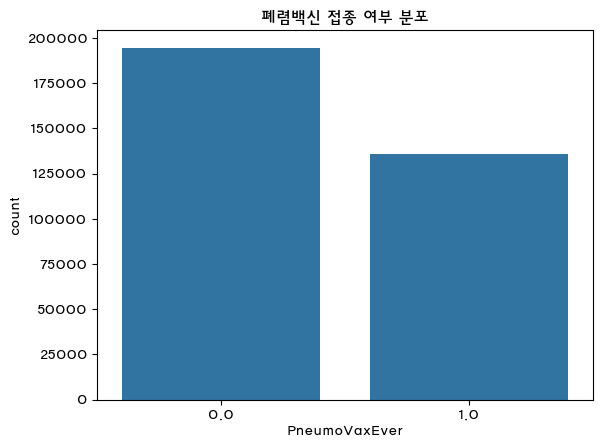

In [169]:
#코로나 확진 / 백신접종 분포
sns.countplot(x='CovidPos', data=df)
plt.title('코로나 확진 여부 분포')
plt.show()

sns.countplot(x='PneumoVaxEver', data=df)
plt.title('폐렴백신 접종 여부 분포')
plt.show()


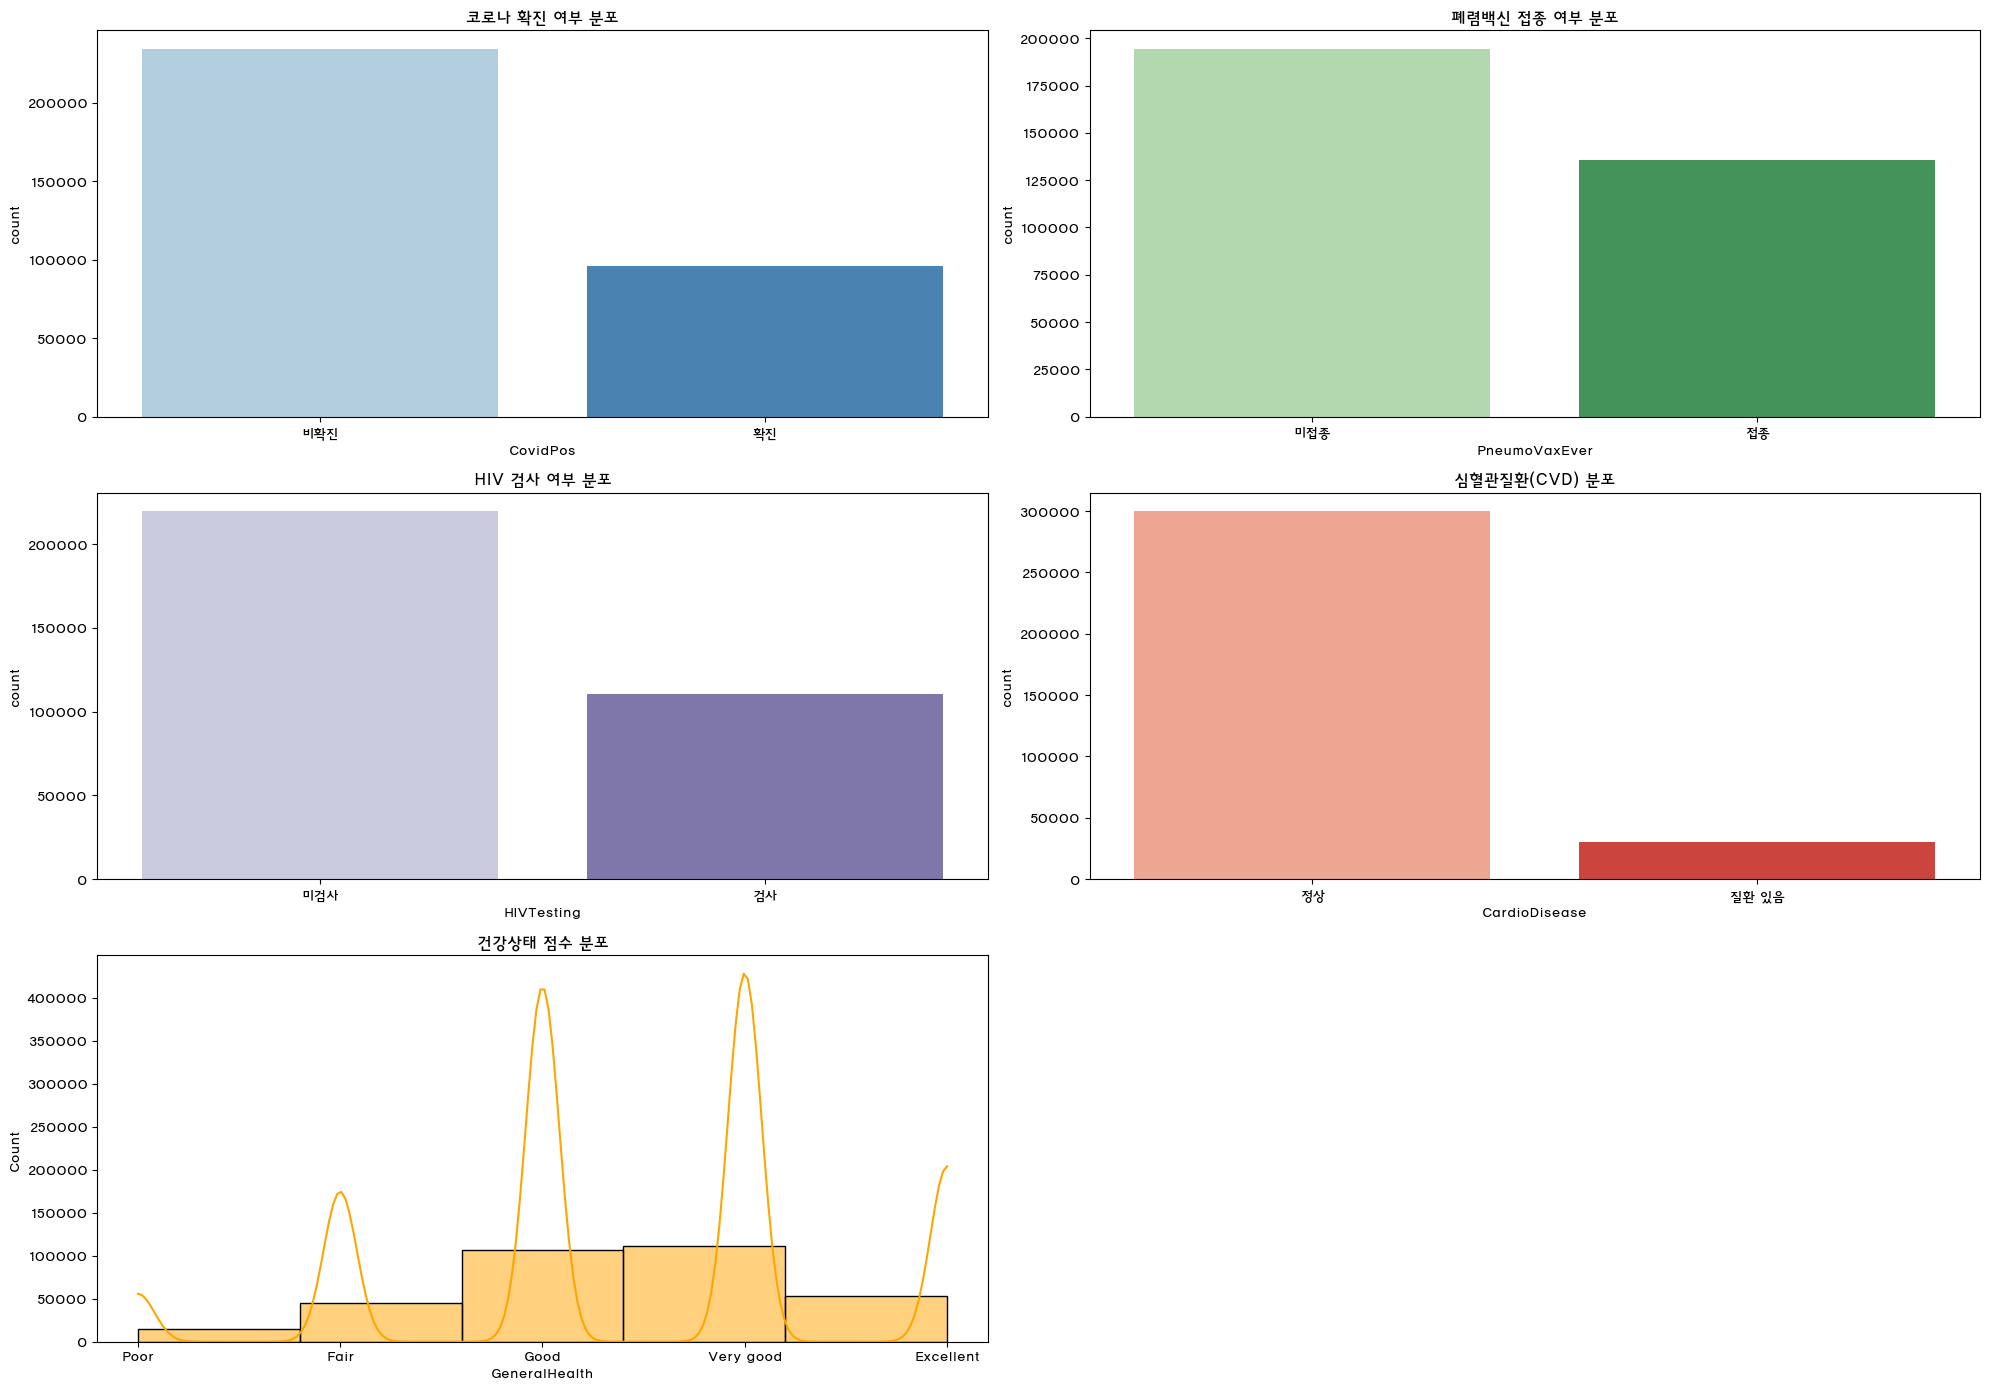

In [170]:
plt.figure(figsize=(20, 14))

# (1) 코로나 확진 분포
plt.subplot(3, 2, 1)
sns.countplot(x='CovidPos', hue='CovidPos', data=df, palette='Blues', legend=False)
plt.xticks([0, 1], ['비확진', '확진'])
plt.title('코로나 확진 여부 분포')

# (2) 폐렴백신 접종 분포
plt.subplot(3, 2, 2)
sns.countplot(x='PneumoVaxEver', hue='PneumoVaxEver', data=df, palette='Greens', legend=False)
plt.xticks([0, 1], ['미접종', '접종'])
plt.title('폐렴백신 접종 여부 분포')

# (3) HIV 검사 여부 분포
plt.subplot(3, 2, 3)
sns.countplot(x='HIVTesting', hue='HIVTesting', data=df, palette='Purples', legend=False)
plt.xticks([0, 1], ['미검사', '검사'])
plt.title('HIV 검사 여부 분포')

# (4) 심혈관질환 분포
plt.subplot(3, 2, 4)
sns.countplot(x='CardioDisease', hue='CardioDisease', data=df, palette='Reds', legend=False)
plt.xticks([0, 1], ['정상', '질환 있음'])
plt.title('심혈관질환(CVD) 분포')

# (5) 건강상태 분포 (히스토그램)
plt.subplot(3, 2, 5)
sns.histplot(df['GeneralHealth'], bins=5, kde=True, color='orange')
plt.xticks([1, 2, 3, 4, 5], ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'])
plt.title('건강상태 점수 분포')

plt.tight_layout()
plt.show()

### 08. 변수 간 관계 시각화

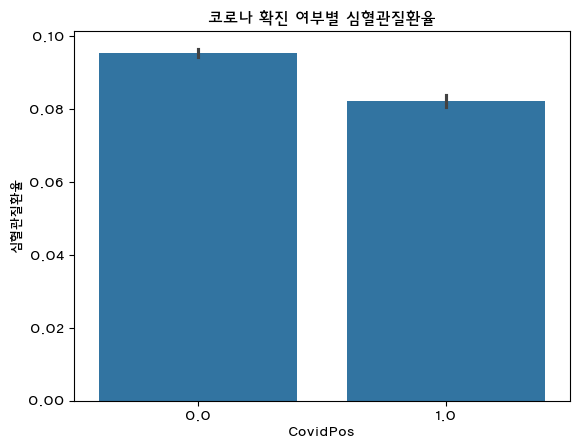

In [171]:
# 코로나 확진 여부 vs 심혈관질환율
sns.barplot(x='CovidPos', y='CardioDisease', data=df)
plt.title('코로나 확진 여부별 심혈관질환율')
plt.ylabel('심혈관질환율')
plt.show()


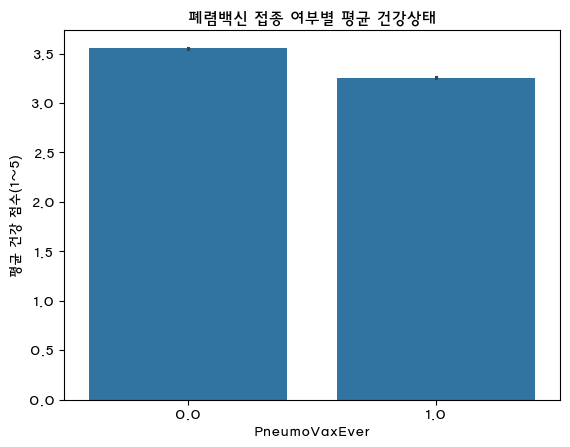

In [132]:
# 백신 접종 여부 vs 건강상태 평균
sns.barplot(x='PneumoVaxEver', y='GeneralHealth', data=df)
plt.title('폐렴백신 접종 여부별 평균 건강상태')
plt.ylabel('평균 건강 점수(1~5)')
plt.show()


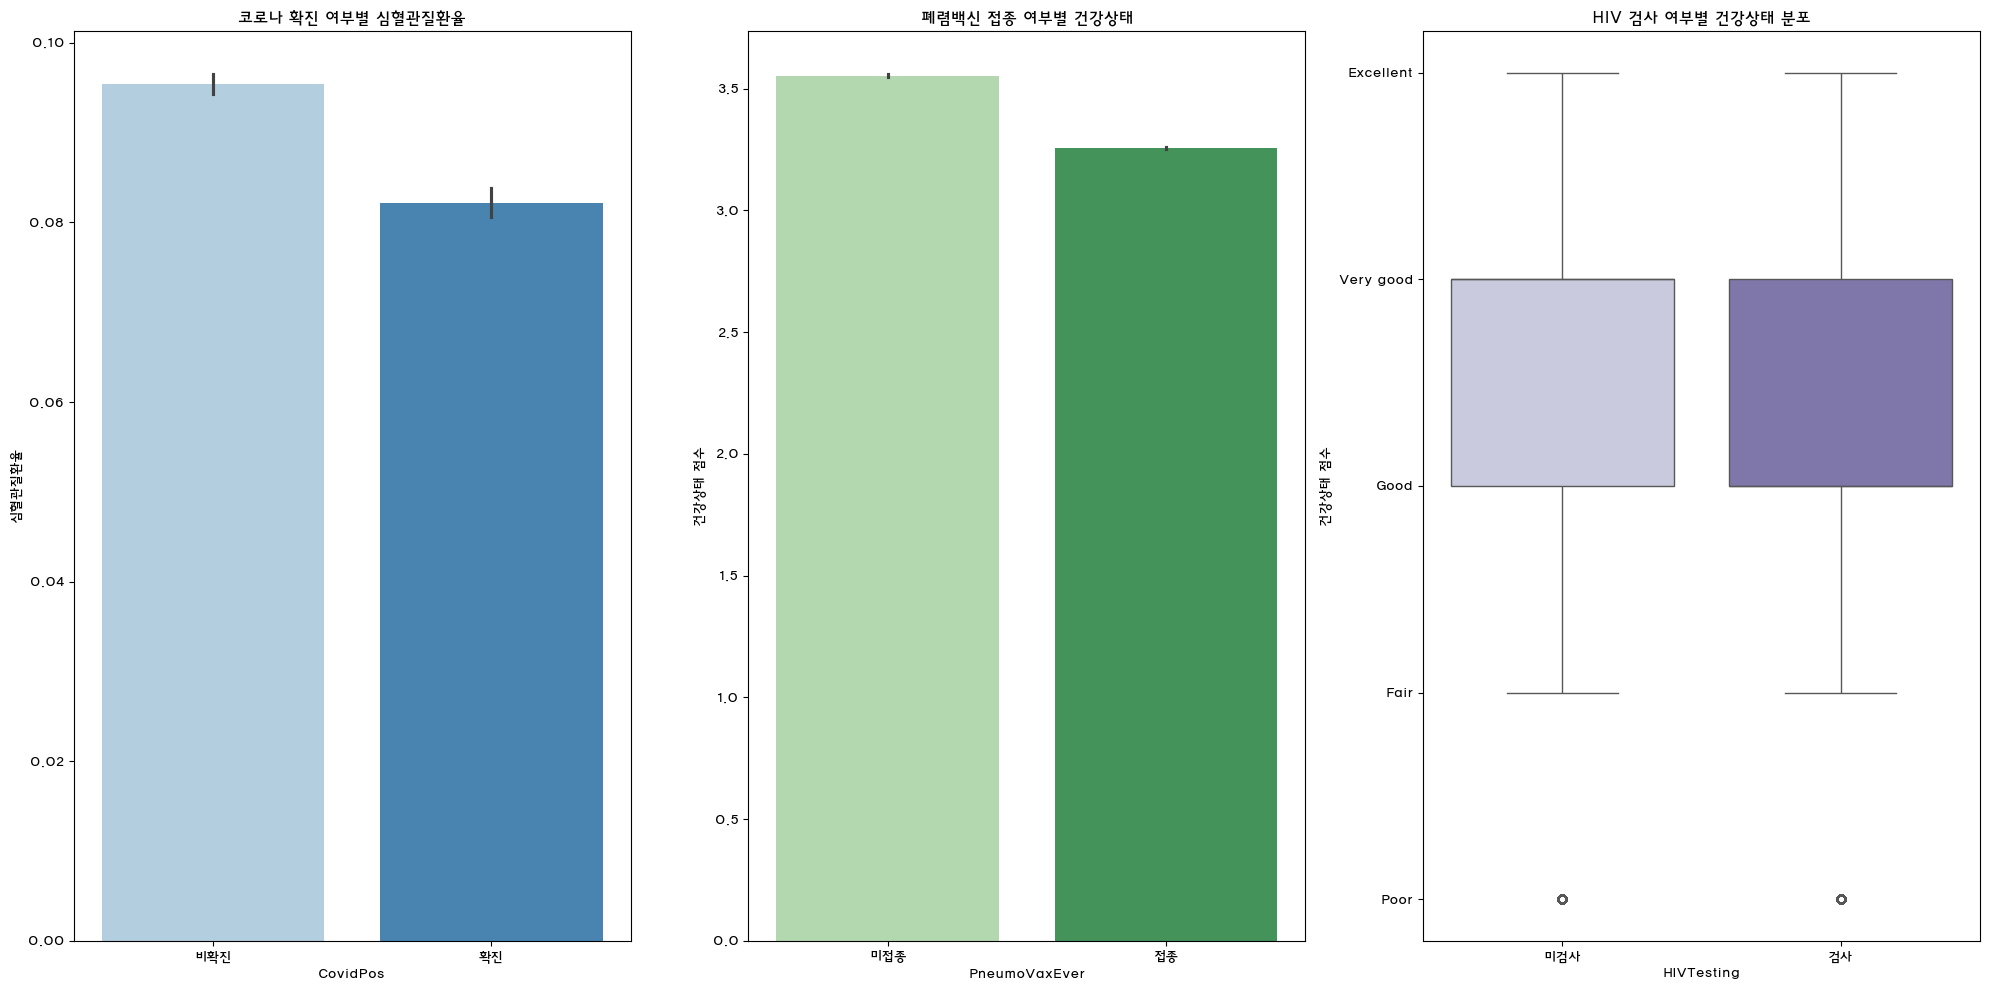

In [148]:
plt.figure(figsize=(20, 10))

# (1) 코로나 확진 여부 → 심혈관질환율
plt.subplot(1, 3, 1)
sns.barplot(x='CovidPos', y='CardioDisease',
            hue='CovidPos', data=df, palette='Blues', legend=False)
plt.title('코로나 확진 여부별 심혈관질환율')
plt.xticks([0, 1], ['비확진', '확진'])
plt.ylabel('심혈관질환율')

# (2) 폐렴백신 접종 여부 → 평균 건강상태
plt.subplot(1, 3, 2)
sns.barplot(x='PneumoVaxEver', y='GeneralHealth',
            hue='PneumoVaxEver', data=df, palette='Greens', legend=False)
plt.title('폐렴백신 접종 여부별 건강상태')
plt.xticks([0, 1], ['미접종', '접종'])
plt.ylabel('건강상태 점수')

# (3) HIV 검사 여부 → 건강상태 분포
plt.subplot(1, 3, 3)
sns.boxplot(x='HIVTesting', y='GeneralHealth',
            hue='HIVTesting', data=df, palette='Purples', legend=False)
plt.title('HIV 검사 여부별 건강상태 분포')
plt.xticks([0, 1], ['미검사', '검사'])
plt.yticks([1, 2, 3, 4, 5], ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'])
plt.ylabel('건강상태 점수')

plt.tight_layout()
plt.show()

### 09. 상관관계 및 교차 분석

In [133]:
# 수치형 상관관계
df.corr()
# CovidPos - CardioDisease(심혈관질환)
# PneumoVaxEver - GeneralHealth

,CovidPos,PneumoVaxEver,HIVTesting,HadHeartAttack,HadAngina,GeneralHealth,CardioDisease
CovidPos,1.000000,-0.076310,0.079000,-0.018114,-0.014643,-0.004818,-0.020774
PneumoVaxEver,-0.076310,1.000000,-0.074707,0.117790,0.156071,-0.139655,0.165968
HIVTesting,0.079000,-0.074707,1.000000,-0.013291,-0.023192,-0.041686,-0.025394
HadHeartAttack,-0.018114,0.117790,-0.013291,1.000000,0.441364,-0.183808,0.774226
HadAngina,-0.014643,0.156071,-0.023192,0.441364,1.000000,-0.200224,0.817054
GeneralHealth,-0.004818,-0.139655,-0.041686,-0.183808,-0.200224,1.000000,-0.226928
CardioDisease,-0.020774,0.165968,-0.025394,0.774226,0.817054,-0.226928,1.000000


In [134]:
# 범주형끼리 교차표
pd.crosstab(df['CovidPos'], df['CardioDisease'])


CardioDisease,0,1
CovidPos,,
0.0,212158,22379
1.0,87849,7869


In [135]:
# 백신 접종 여부와 건강상태 교차표
pd.crosstab(df['PneumoVaxEver'], df['GeneralHealth'])


GeneralHealth,1.0,2.0,3.0,4.0,5.0
PneumoVaxEver,,,,,
0.0,6133,22375,60822,68048,37190
1.0,8305,22812,46008,42949,15613


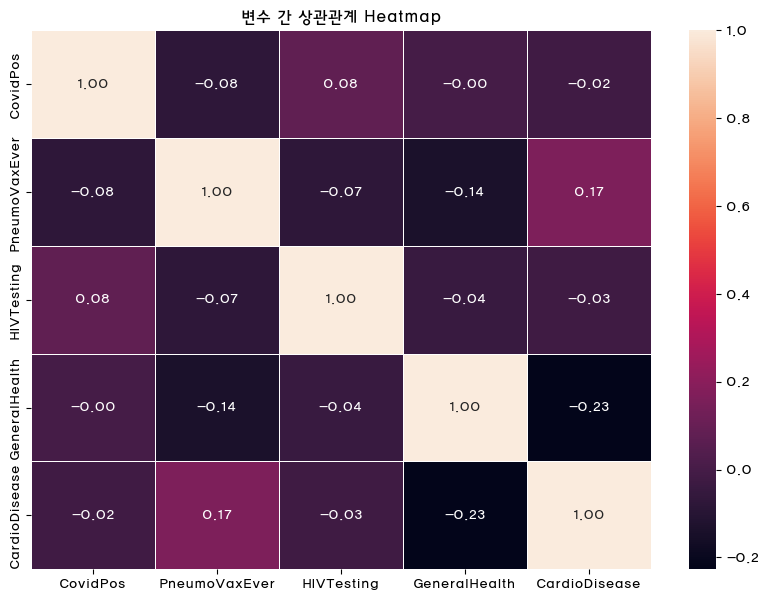

In [141]:
# 상관관계 Heatmap
plt.figure(figsize=(10, 7))
corr = df[['CovidPos','PneumoVaxEver','HIVTesting','GeneralHealth','CardioDisease']].corr()

sns.heatmap(corr, annot=True, linewidths=0.5, fmt='.2f')
plt.title('변수 간 상관관계 Heatmap')
plt.show()